In [1]:
import warnings
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from src import utils, plotting

warnings.filterwarnings("ignore")
pd.set_option("display.float_format", "{:,.2f}".format)

In [2]:
ticker = "MSTR"
stock = yf.Ticker(ticker.upper())
history = stock.history(period="max")

In [16]:
history.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Indicator
count,"1,226.00","1,226.00","1,226.00","1,226.00","1,226.00","1,226.00","1,226.00","1,213.00"
mean,55.18,57.19,53.20,55.20,"8,027,606.73",0.00,0.01,52.73
std,49.78,52.07,47.64,49.90,"7,487,982.12",0.00,0.29,13.29
min,9.18,10.41,9.00,9.22,"234,000.00",0.00,0.00,13.66
25%,20.85,21.93,19.82,20.95,"3,513,250.00",0.00,0.00,43.27
50%,38.14,39.47,36.88,37.94,"6,376,000.00",0.00,0.00,51.38
75%,65.91,68.21,63.74,65.84,"10,169,500.00",0.00,0.00,62.32
max,366.83,383.40,325.50,356.59,"57,366,000.00",0.00,10.00,93.91


In [4]:
stock.info

{'address1': '1850 Towers Crescent Plaza',
 'city': 'Tysons Corner',
 'state': 'VA',
 'zip': '22182',
 'country': 'United States',
 'phone': '703 848 8600',
 'fax': '703 848 8610',
 'website': 'https://www.microstrategy.com',
 'industry': 'Software - Application',
 'industryKey': 'software-application',
 'industryDisp': 'Software - Application',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'MicroStrategy Incorporated provides artificial intelligence-powered enterprise analytics software and services in the United States, Europe, the Middle East, Africa, and internationally. It offers MicroStrategy ONE, which provides non-technical users with the ability to directly access novel and actionable insights for decision-making; and MicroStrategy Cloud for Government service, which offers always-on threat monitoring that meets the rigorous technical and regulatory needs of governments and financial institutions. The company also pro

In [5]:
stock.financials

,2023-12-31,2022-12-31,2021-12-31,2020-12-31,2019-12-31
Tax Effect Of Unusual Items,"-14,944,650.00","-270,120,060.00","-282,411,140.00","-19,088,460.00",NaN
Tax Rate For Calcs,0.21,0.21,0.34,0.27,NaN
Normalized EBITDA,"10,127,000.00","27,831,000.00","59,739,000.00","141,103,000.00",NaN
Total Unusual Items,"-71,165,000.00","-1,286,286,000.00","-830,621,000.00","-70,698,000.00",NaN
Total Unusual Items Excluding Goodwill,"-71,165,000.00","-1,286,286,000.00","-830,621,000.00","-70,698,000.00",NaN
Net Income From Continuing Operation Net Minority Interest,"429,121,000.00","-1,469,797,000.00","-535,480,000.00","-7,524,000.00",NaN
Reconciled Depreciation,"14,527,000.00","10,874,000.00","11,358,000.00","13,332,000.00",NaN
Reconciled Cost Of Revenue,"109,944,000.00","102,989,000.00","91,909,000.00","91,055,000.00",NaN
EBITDA,"-61,038,000.00","-1,258,455,000.00","-770,882,000.00","70,405,000.00",NaN
EBIT,"-75,565,000.00","-1,269,329,000.00","-782,240,000.00","57,073,000.00",NaN


In [6]:
stock.cash_flow

,2023-12-31,2022-12-31,2021-12-31,2020-12-31,2019-12-31
Free Cash Flow,"-1,892,525,000.00","-287,196,000.00","-2,535,402,000.00","-1,075,032,000.00",NaN
Repurchase Of Capital Stock,NaN,0.00,0.00,"-123,224,000.00","-72,719,000.00"
Repayment Of Debt,"-160,546,000.00","-246,000.00",0.00,0.00,NaN
Issuance Of Debt,0.00,"215,793,000.00","1,550,000,000.00","650,000,000.00",NaN
Issuance Of Capital Stock,"2,029,214,000.00","46,592,000.00","1,000,000,000.00",0.00,NaN
Capital Expenditure,"-1,905,237,000.00","-290,407,000.00","-2,629,235,000.00","-1,128,651,000.00",NaN
Interest Paid Supplemental Data,"41,229,000.00","43,448,000.00","20,416,000.00","178,000.00",NaN
Income Tax Paid Supplemental Data,"30,318,000.00","21,973,000.00","7,010,000.00","6,803,000.00",NaN
End Cash Position,"48,673,000.00","50,868,000.00","64,434,000.00","60,759,000.00",NaN
Beginning Cash Position,"50,868,000.00","64,434,000.00","60,759,000.00","457,816,000.00",NaN


In [7]:
stock.balance_sheet

,2023-12-31,2022-12-31,2021-12-31,2020-12-31,2019-12-31
Treasury Shares Number,"86,840,000.00","86,840,000.00","86,840,000.00","86,840,000.00",NaN
Ordinary Shares Number,"168,680,000.00","115,490,000.00","112,860,000.00","95,870,000.00",NaN
Share Issued,"255,520,000.00","202,330,000.00","199,700,000.00","182,710,000.00",NaN
Net Debt,"2,135,774,000.00","2,335,179,000.00","2,091,795,000.00","426,691,000.00",NaN
Total Debt,"2,243,677,000.00","2,446,358,000.00","2,231,759,000.00","570,694,000.00",NaN
...,...,...,...,...,...
Allowance For Doubtful Accounts Receivable,"-3,069,000.00","-2,564,000.00","-2,775,000.00","-2,760,000.00",NaN
Gross Accounts Receivable,"186,884,000.00","191,844,000.00","192,055,000.00","200,221,000.00",NaN
Cash Cash Equivalents And Short Term Investments,"46,817,000.00","43,835,000.00","63,356,000.00","59,675,000.00",NaN
Other Short Term Investments,NaN,NaN,NaN,0.00,"108,919,000.00"


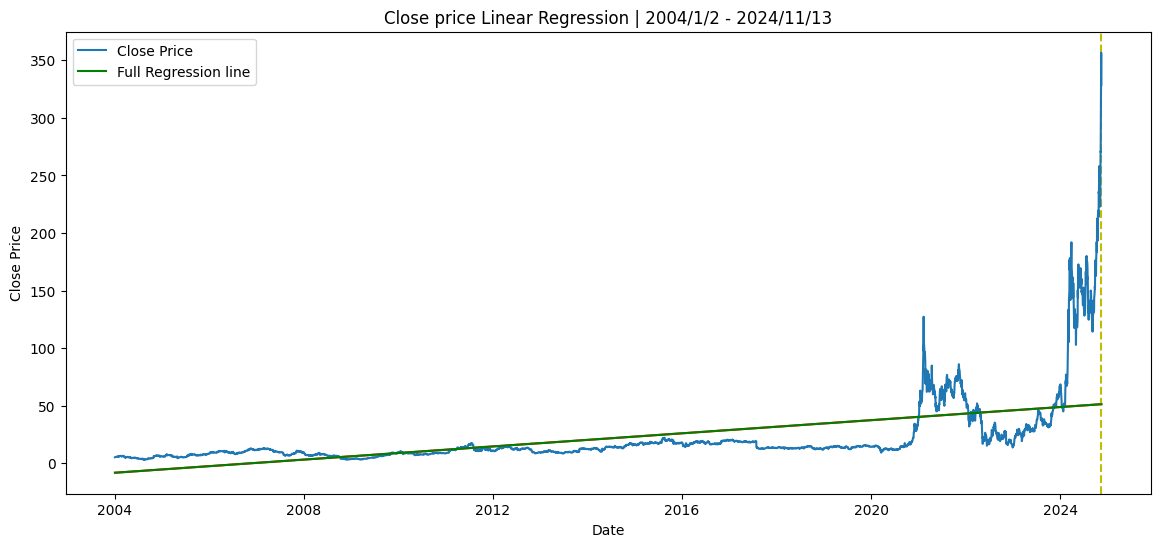

Coefficient (slope): 0.011336594119549914


In [8]:
a = plotting.plot_regression_line(history["2004":], reg_line_count=0, log_scale=False)

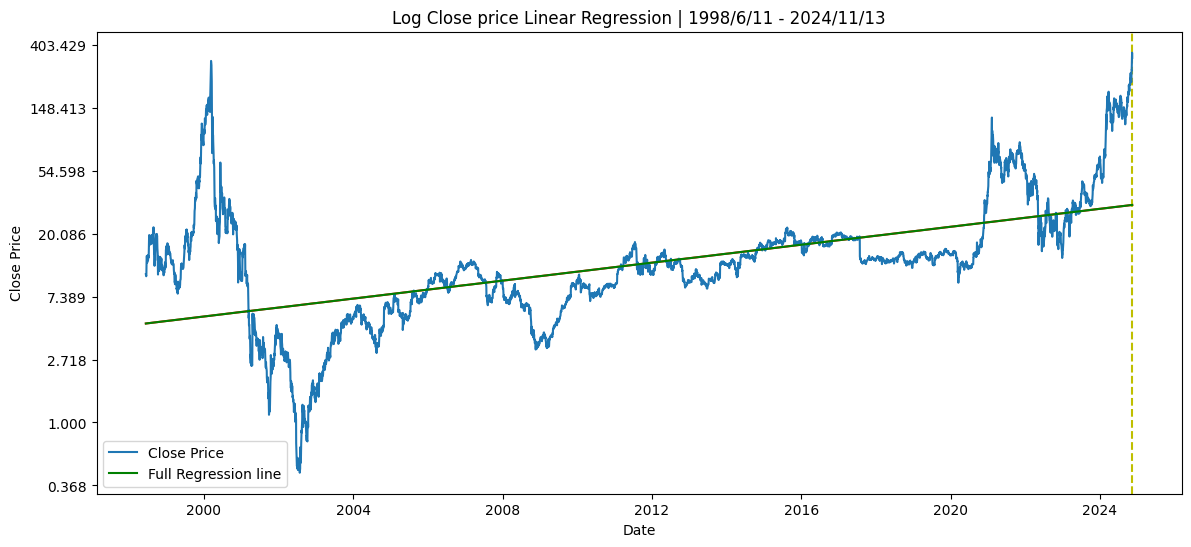

Coefficient (slope): 0.00028337816772948534


<module 'matplotlib.pyplot' from '/Users/ivankyulev/Projects/Notebooks/.venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [9]:
plotting.plot_regression_line(history["1998":], reg_line_count=1, log_scale=True)

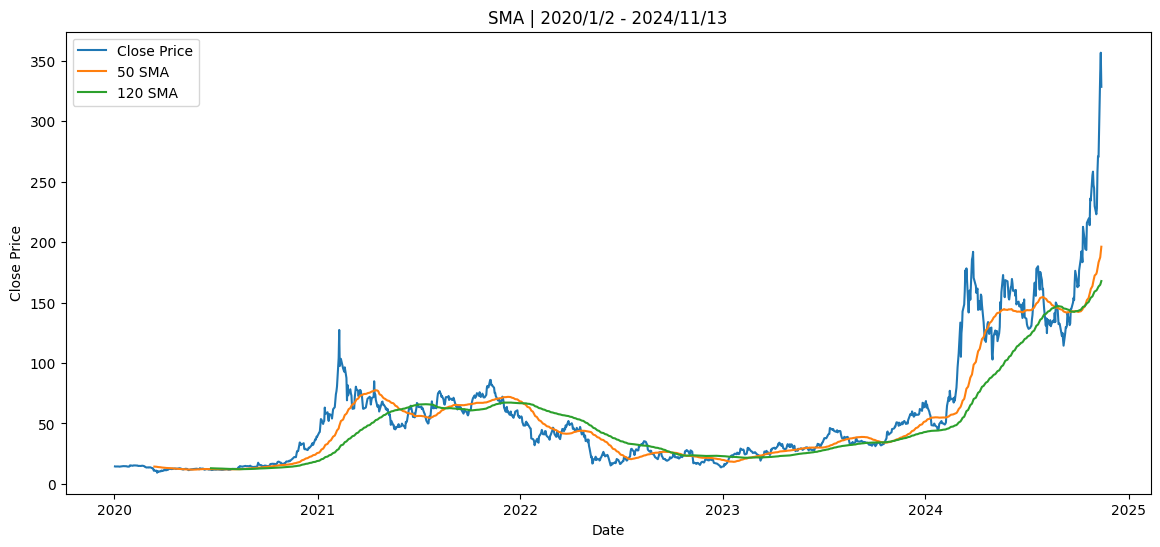

<BarContainer object of 6651 artists>

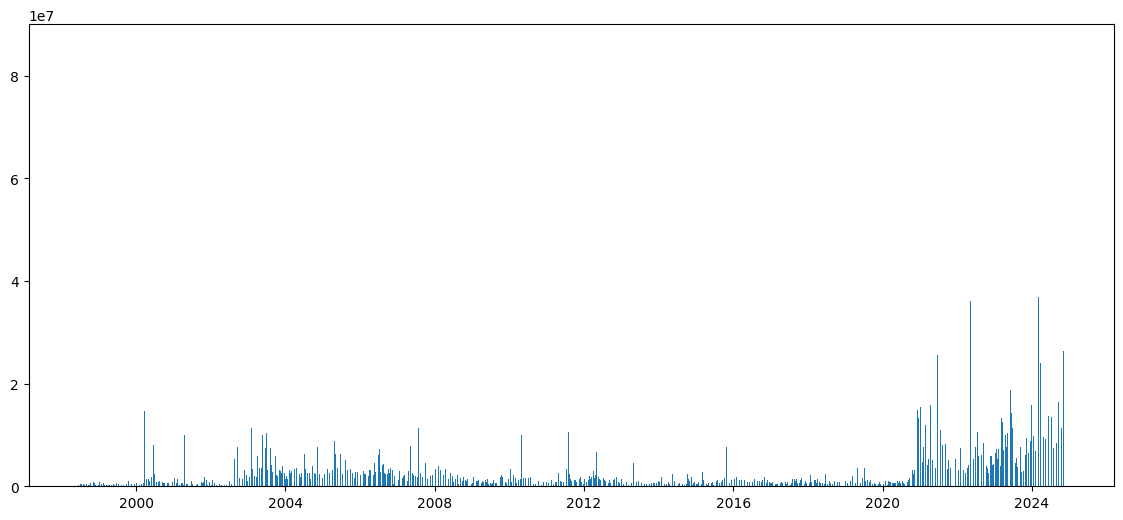

In [10]:
plotting.plot_sma(history["2020":], [50, 120], hide_data=False)
plt.figure(figsize=(14, 6))
plt.bar(history.index, history["Volume"])

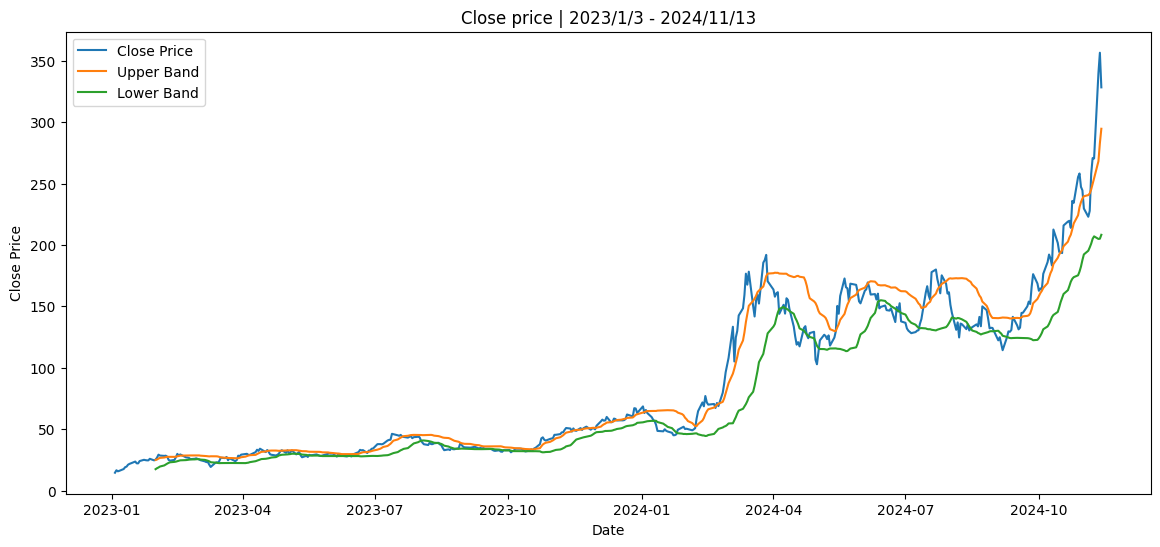

In [11]:
plotting.plot_bolinger_bands(history["2023":], 20, 1)

In [12]:
import ta
import pandas as pd
from ta.utils import dropna

history = history["2020":]
indicator = ta.momentum.RSIIndicator(history["Close"])

history["Indicator"] = indicator.rsi()

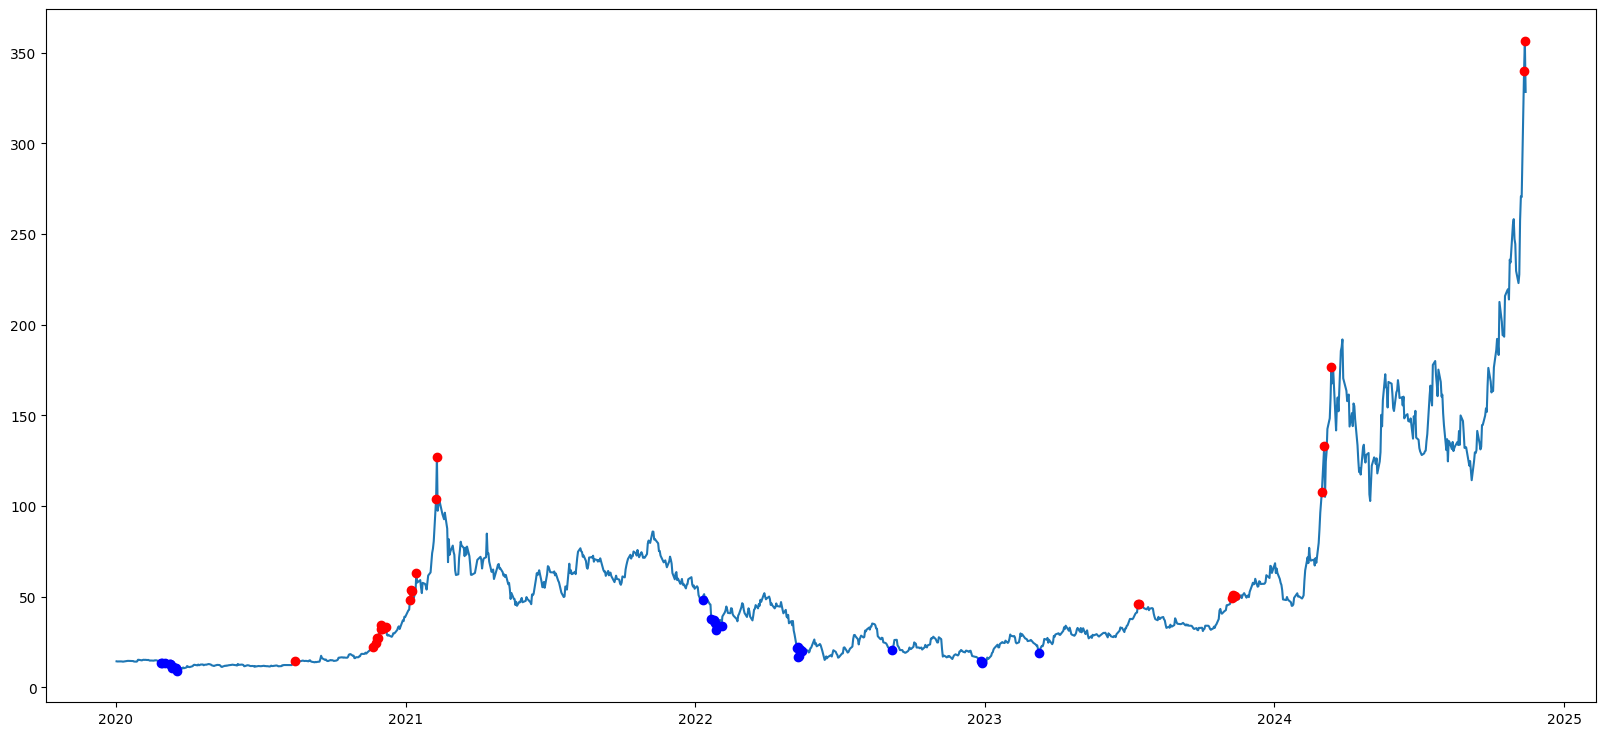

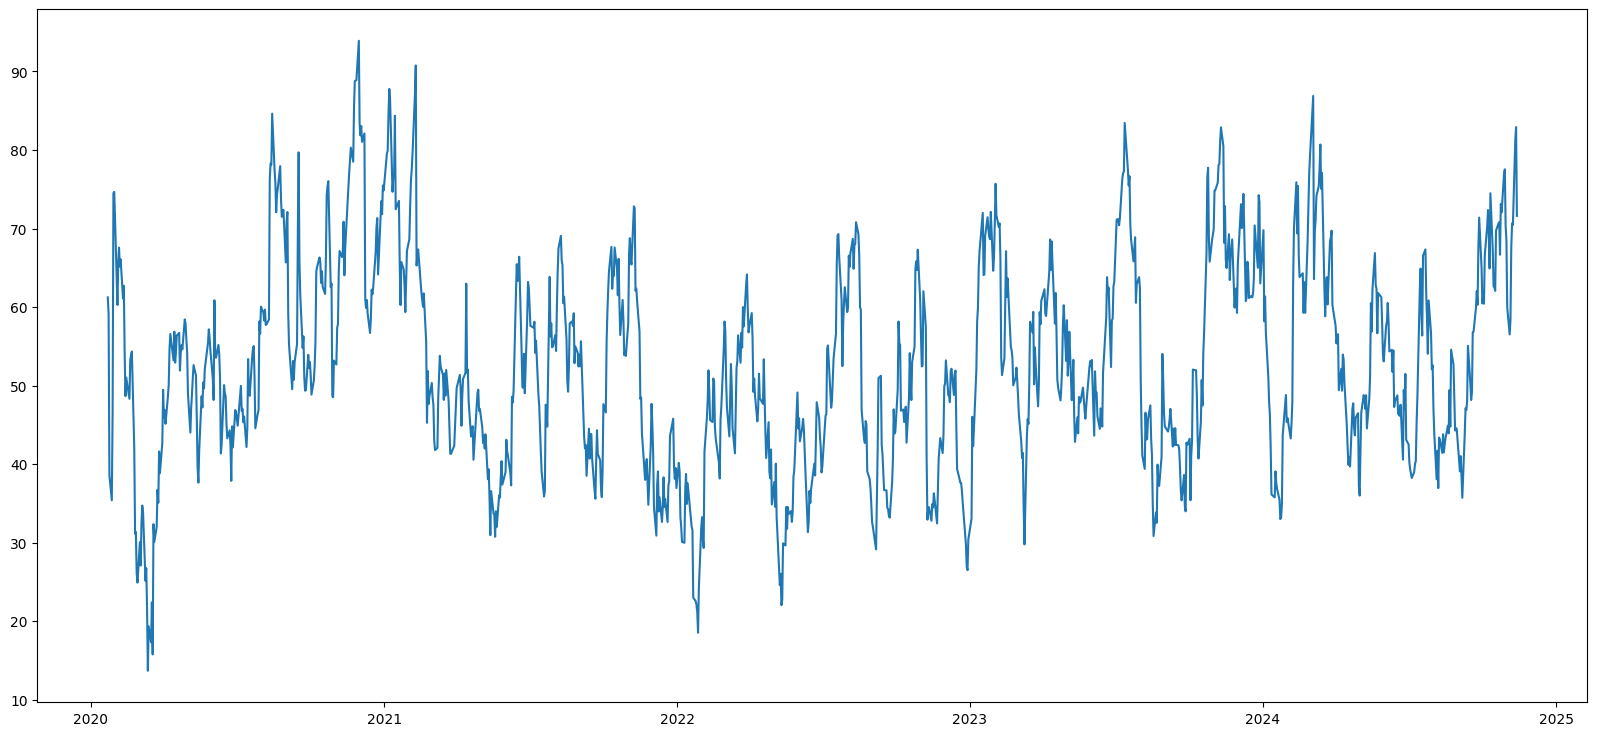

In [13]:
plt.figure(figsize=(20, 9))
plt.plot(history["Close"])
filter_high = history["Indicator"] >= 80
filter_low = history["Indicator"] <= 30
plt.plot(history.index[filter_high], history["Close"][filter_high], marker="o", linestyle="None", color="red")
plt.plot(history.index[filter_low], history["Close"][filter_low], marker="o", linestyle="None", color="blue")
plt.figure(figsize=(20, 9))
plt.plot(history["Indicator"])

In [14]:
type(history["Close"])

pandas.core.series.Series